In [1]:
%run functions.ipynb

In [2]:
X,Gamma,F,loading,f=generate_test_data(100,1000,prt=True)

off_diagonal sum= 1.5930827511957055


In [3]:
def auto_cov(y,k):
    """calculate the auto covariance matrix of vector time series y with its k-lagged version.
    y is an numpy array of dimension p*T"""
    mean=np.array([np.mean(y,axis=1)]).T
    #print(mean)
    T=y.shape[1]
    y_t=y
    y_t_plus_k=np.roll(y_t,-k,axis=1)
    y_t=y_t[:,:T-k]-mean
    y_t_plus_k=y_t_plus_k[:,:T-k]-mean
    
    return y_t_plus_k@(y_t.T)/(T-k)

In [185]:
auto_cov(x,1)

array([[0.41666667, 0.41666667],
       [0.41666667, 0.41666667]])

In [4]:
def construct_M(y,k_0):
    Sigma=auto_cov(y,1)
    M=Sigma@(Sigma.T)
    for k in range(2,k_0+1):
        Sigma=auto_cov(y,k)
        M=M+Sigma@(Sigma.T)
    return M

In [10]:
M=construct_M(X,3)

In [7]:
import numpy.linalg as linalg
def eigen_decomp(M):
    eigenValues, eigenVectors = linalg.eig(M)

    idx = eigenValues.argsort()[::-1]   
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    
    return eigenValues,eigenVectors

In [13]:
eigen_decomp(M)[0]

array([4.90646780e+01, 1.53182998e+01, 3.12587570e-01, 1.39243766e-01,
       4.51887483e-02, 2.55890054e-02, 2.24493716e-02, 1.78804389e-02,
       1.66801640e-02, 1.33751559e-02, 1.20694655e-02, 9.97405334e-03,
       9.71032805e-03, 7.35331350e-03, 6.42957886e-03, 4.33190120e-03,
       3.19065933e-03, 2.46214155e-03, 1.56834063e-03, 1.55366369e-03,
       1.46378100e-03, 1.38719203e-03, 1.36107796e-03, 1.32213712e-03,
       1.27307711e-03, 1.24709116e-03, 1.22693427e-03, 1.16038807e-03,
       1.12435285e-03, 1.11443358e-03, 1.08436676e-03, 1.04629727e-03,
       1.01655335e-03, 1.00685152e-03, 9.42223076e-04, 9.34712044e-04,
       9.21941176e-04, 8.72319569e-04, 8.69510318e-04, 8.59404347e-04,
       8.27114114e-04, 8.22073474e-04, 7.88984274e-04, 7.63647702e-04,
       7.43356678e-04, 7.29758939e-04, 7.09907462e-04, 6.86026526e-04,
       6.74397037e-04, 6.62918101e-04, 6.56390571e-04, 6.14406563e-04,
       6.11223978e-04, 6.08244933e-04, 6.02212529e-04, 5.82268840e-04,
      

In [21]:
m=np.array([auto_cov(X,1),auto_cov(X,2),auto_cov(X,3)])
np.reshape(np.moveaxis(m,0,2),(100,-1)).shape

(100, 300)

In [23]:
linalg.svd(np.reshape(np.moveaxis(m,0,2),(100,-1)))[1]**2

array([4.90646780e+01, 1.53182998e+01, 3.12587570e-01, 1.39243766e-01,
       4.51887483e-02, 2.55890054e-02, 2.24493716e-02, 1.78804389e-02,
       1.66801640e-02, 1.33751559e-02, 1.20694655e-02, 9.97405334e-03,
       9.71032805e-03, 7.35331350e-03, 6.42957886e-03, 4.33190120e-03,
       3.19065933e-03, 2.46214155e-03, 1.56834063e-03, 1.55366369e-03,
       1.46378100e-03, 1.38719203e-03, 1.36107796e-03, 1.32213712e-03,
       1.27307711e-03, 1.24709116e-03, 1.22693427e-03, 1.16038807e-03,
       1.12435285e-03, 1.11443358e-03, 1.08436676e-03, 1.04629727e-03,
       1.01655335e-03, 1.00685152e-03, 9.42223076e-04, 9.34712044e-04,
       9.21941176e-04, 8.72319569e-04, 8.69510318e-04, 8.59404347e-04,
       8.27114114e-04, 8.22073474e-04, 7.88984274e-04, 7.63647702e-04,
       7.43356678e-04, 7.29758939e-04, 7.09907462e-04, 6.86026526e-04,
       6.74397037e-04, 6.62918101e-04, 6.56390571e-04, 6.14406563e-04,
       6.11223978e-04, 6.08244933e-04, 6.02212529e-04, 5.82268840e-04,
      

In [212]:
def select_r(eigen_Values):
    limit=len(eigen_Values)//2+1
    e_values=eigen_Values[:limit]
    ratios=np.roll(e_values,-1)[:-1]/e_values[:-1]
    print(ratios)
    return np.argmin(ratios)

In [301]:
import numpy.linalg as linalg
class Yao():
    def __init__(self, data,  max_lag_to_check):
        self.observations=data
        self.max_lag=max_lag_to_check
        self.n_factor=None
        self.M=None
        self.loading=None
        self.factors=None
    def fit(self):
        def auto_cov(y,k):
            """calculate the auto covariance matrix of vector time series y with its k-lagged version.
            y is an numpy array of dimension p*T"""
            mean=np.array([np.mean(y,axis=1)]).T
            #print(mean)
            T=y.shape[1]
            y_t=y
            y_t_plus_k=np.roll(y_t,-k,axis=1)
            y_t=y_t[:,:T-k]-mean
            y_t_plus_k=y_t_plus_k[:,:T-k]-mean

            return (y_t_plus_k@(y_t.T)).T/(T-k)
        
        def construct_M(y,k_0):
            Sigma=auto_cov(y,1)
            M=Sigma@(Sigma.T)
            for k in range(2,k_0+1):
                Sigma=auto_cov(y,k)
                M=M+Sigma@(Sigma.T)
            return M

        def eigen_decomp(M):
            eigenValues, eigenVectors = linalg.eig(M)

            idx = eigenValues.argsort()[::-1]   
            eigenValues = eigenValues[idx]
            eigenVectors = eigenVectors[:,idx]

            return eigenValues,eigenVectors
        
        def select_r(eigen_Values):
            limit=len(eigen_Values)//2+1
            e_values=eigen_Values[:limit]
            ratios=np.roll(e_values,-1)[:-1]/e_values[:-1]
            print(ratios)
            return np.argmin(ratios)+1
        
        self.M=construct_M(self.observations,self.max_lag)
        
        eigenValues,eigenVectors=eigen_decomp(self.M)
        
        self.n_factor=select_r(eigenValues)
        
        self.loading=eigenVectors[:,:self.n_factor]
        
        self.factors=self.loading.T@self.observations

In [309]:
model=Yao(X,10)

In [310]:
model.fit()

[0.82170153 0.02236887 0.65421455 0.56353709 0.27786227 0.75470376
 0.77453989 0.76068062 0.83561661 0.9522663  0.90303993 0.93260677
 0.93085511 0.98214813 0.90078409 0.96025253 0.92051332 0.93412647
 0.95004821 0.95394584 0.90772306 0.9684753  0.95839927 0.95146917
 0.9146377  0.98134821 0.92677511 0.95568767 0.92416685 0.95430497
 0.95728585 0.92853219 0.96666354 0.95375088 0.96184746 0.86702317
 0.99032131 0.9617251  0.88686174 0.97467628 0.9263339  0.97802563
 0.94724426 0.95145739 0.97359229 0.95409948 0.95921027 0.9451591
 0.98650146 0.98754405]


In [311]:
model.n_factor

2

In [312]:
trace_stat(F[:2],model.factors)

0.977268534513645

r2= 0.9806588281121787
r2= 0.9644087075591303


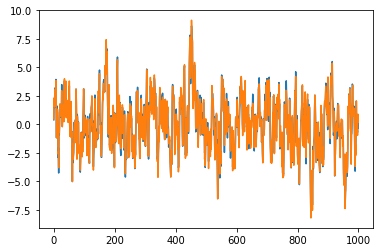

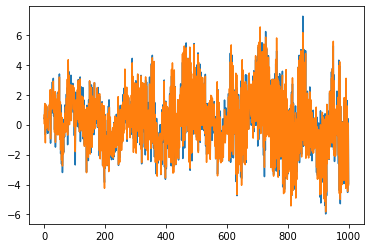

In [313]:
compare_factor_plot(F,model.factors)

r2= 0.9718383958670119
r2= 0.974182360425466


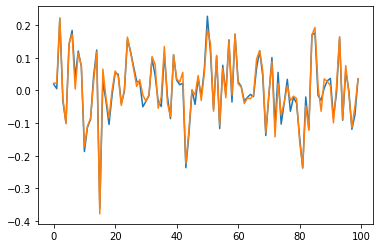

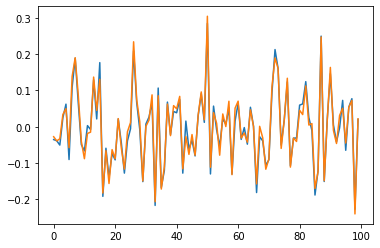

In [314]:
compare_loading_plot(loading,model.loading)